# Multi-Layer-Perceptron (MLP)

This is often described as the most fundamental neural network. But why is this the case? Is it because it was a type of model that was developed early in the 90s, or because it was providing promising result? Let's go through the main areas to understand the Multi-Layer-Perceptron (MLP).

## Brief history:

From [Wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron): In 1958, a layered network of perceptrons, consisting of an input layer, a hidden layer with randomized weights that did not learn, and an output layer with learning connections, was introduced already by Frank Rosenblatt in his book Perceptron.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import sys

import torch
import torch.nn as nn

from torchmetrics import MeanAbsolutePercentageError

In [ ]:
from data.passenger import get_passenger_data
from data.gold import get_gold_data

In [ ]:
gold_data = get_gold_data()
passenger_data = get_passenger_data()

In [ ]:
passenger_data.head(2)

,Date,Passengers
0,1949-01,112
1,1949-02,118


In [ ]:
# creating tensor from targets_df
passenger_tensor = torch.tensor(passenger_data['Passengers'].values)

# printing out result
print(passenger_tensor)

tensor([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
        141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163,
        172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218,
        230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272,
        237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229,
        203, 229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
        284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301,
        356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348,
        363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
        548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606,
        508, 461, 390, 432])


In [ ]:
# normalise the values between 0 and 1:
passenger_tensor.max()

tensor(622)

In [ ]:
passenger_tensor = passenger_tensor / 622

In [ ]:
passenger_tensor

tensor([0.1801, 0.1897, 0.2122, 0.2074, 0.1945, 0.2170, 0.2379, 0.2379, 0.2186,
        0.1913, 0.1672, 0.1897, 0.1849, 0.2026, 0.2267, 0.2170, 0.2010, 0.2395,
        0.2733, 0.2733, 0.2540, 0.2138, 0.1833, 0.2251, 0.2331, 0.2412, 0.2862,
        0.2621, 0.2765, 0.2862, 0.3199, 0.3199, 0.2958, 0.2605, 0.2347, 0.2669,
        0.2749, 0.2894, 0.3103, 0.2910, 0.2942, 0.3505, 0.3698, 0.3891, 0.3360,
        0.3071, 0.2765, 0.3119, 0.3151, 0.3151, 0.3794, 0.3778, 0.3682, 0.3907,
        0.4244, 0.4373, 0.3810, 0.3392, 0.2894, 0.3232, 0.3280, 0.3023, 0.3778,
        0.3650, 0.3762, 0.4244, 0.4855, 0.4711, 0.4164, 0.3682, 0.3264, 0.3682,
        0.3891, 0.3746, 0.4293, 0.4325, 0.4341, 0.5064, 0.5852, 0.5579, 0.5016,
        0.4405, 0.3810, 0.4469, 0.4566, 0.4453, 0.5096, 0.5032, 0.5113, 0.6013,
        0.6640, 0.6511, 0.5707, 0.4920, 0.4357, 0.4920, 0.5064, 0.4839, 0.5723,
        0.5595, 0.5707, 0.6785, 0.7476, 0.7508, 0.6495, 0.5579, 0.4904, 0.5402,
        0.5466, 0.5113, 0.5820, 0.5595, 

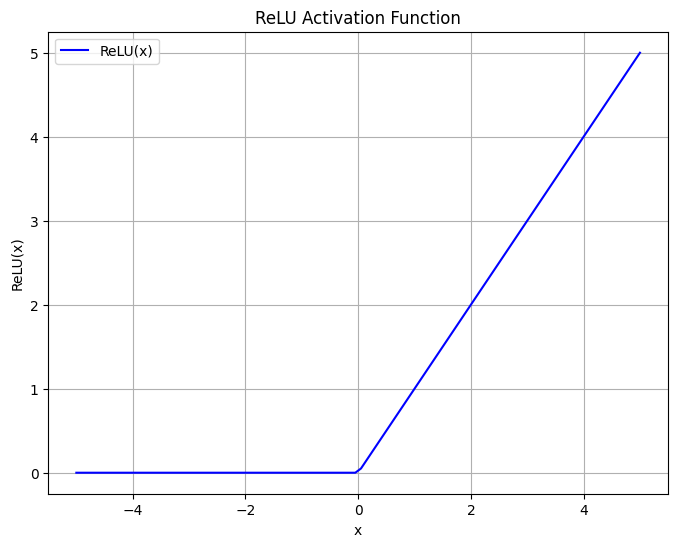

In [ ]:
# Generate a range of values for x
x = np.linspace(-5, 5, 100)
# Apply the ReLU activation function
y = np.maximum(0, x)

# Plot the ReLU activation function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU(x)', color='blue')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.legend()
plt.show()

ReLU adds non-linearity because it selectively activates (passes through) positive values linearly while suppressing (setting to zero) negative values, creating a piecewise-linear function that can approximate a wide range of complex, non-linear functions.

In [ ]:
def your_own_relu(x):
    if x >= 0:
        return x
    else:
        return 0

In [ ]:
class olles_MLP(nn.Module):
    